In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

C:\Users\sanoo\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import numpy as np
a=np.array([[1,2,3,4],
           [5,6,7,8]])
np.shape(a)

(2, 4)

In [3]:
X, y = mnist["data"].to_numpy(), mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib.pyplot as plt

In [7]:
a=y[0]

In [8]:
a

'5'

In [9]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
b=X[0]

In [11]:
b=b.reshape(28,28)

Text(0.5, 1.0, 'Label 5')

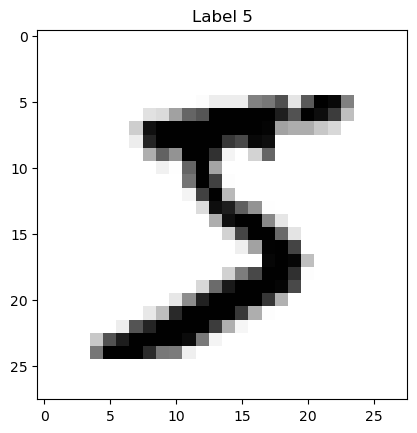

In [12]:
plt.imshow(b,cmap="binary")
plt.title("Label "+a)

In [66]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000].astype(int), y[60000:].astype(int)

In [67]:
X_train.shape

(60000, 784)

In [68]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [69]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: int32

In [70]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [71]:
from sklearn.linear_model import SGDClassifier

In [72]:
sgd_clf=SGDClassifier(random_state=42)

In [73]:
y_train_5.value_counts()

class
False    54579
True      5421
Name: count, dtype: int64

In [84]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

In [88]:
X_train.shape

(60000, 784)

In [95]:
some_digit=some_digit.reshape(-1,28*28)

In [96]:
some_digit.shape

(1, 784)

In [85]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [97]:
sgd_clf.predict(some_digit)

array([ True])

In [98]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [100]:
skfolds=StratifiedKFold(n_splits=3)

In [101]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 

0.95035
0.96035
0.9604


In [102]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    print(train_index,test_index)

[19964 19965 19966 ... 59997 59998 59999] [    0     1     2 ... 20331 20342 20359]
[    0     1     2 ... 59997 59998 59999] [19964 19965 19966 ... 40088 40125 40127]
[    0     1     2 ... 40088 40125 40127] [39988 39989 39990 ... 59997 59998 59999]


In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])